In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy

2023-08-03 11:39:37.364183: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-03 11:39:37.368209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-03 11:39:37.464222: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-03 11:39:37.466392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 11:39:39.240229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
X_train = pd.read_csv("../preprocessing/X_train.csv")
y_train = pd.read_csv("../preprocessing/y_train.csv")
X_test = pd.read_csv("../preprocessing/X_test.csv")
y_test = pd.read_csv("../preprocessing/y_test.csv")

In [3]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
def compile_and_describe_model(model):
    model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
    )
    model.summary()
    return model

In [5]:
def evaluate(history):
    fig, plots = plt.subplots(1, 2, layout=None,figsize=(15, 5))
    plots[0].plot(history.epoch, history.history['loss'])
    plots[0].plot(history.epoch, history.history['val_loss'])
#     plots[0].ylim([0, 1])
    plots[0].legend(['Trening gubitak', 'Validacioni gubitak'])
    
    plots[1].plot(history.epoch, history.history['accuracy'])
    plots[1].plot(history.epoch, history.history['val_accuracy'])
#     plots[1].ylim([0, 1])
    plots[1].legend(['Trening tačnost', 'Validaciona tačnost'])

In [6]:
def compare_models_plot(hist, names):
    fig, plots = plt.subplots(2, 2, figsize=(10, 5))
    for h in hist:
        plots[0,0].plot(h.epoch, h.history['loss'])
        plots[0,0].legend(names)
        plots[0,0].set_title('Gubitak na trening podacima')
    for h in hist:
        plots[0,1].plot(h.epoch, h.history['val_loss'])
        plots[0,1].legend(names)
        plots[0,1].set_title('Gubitak na validacionim podacima')
    for h in hist:
        plots[1,0].plot(h.epoch, h.history['accuracy'])
        plots[1,0].legend(names)
        plots[1,0].set_title('Tačnost na trening podacima')
    for h in hist:
        plots[1,1].plot(h.epoch, h.history['val_accuracy'])
        plots[1,1].legend(names)
        plots[1,1].set_title('Tačnost na validacionim podacima')
    fig.tight_layout()

In [7]:
def test_and_evaluate(model, X_test, y_test_cat):
    test_loss, test_acc = model.evaluate(X_test, y_test_cat)

In [8]:
input_shape = X_train.shape[1]
output_shape = y_test_cat.shape[1]

In [9]:
model1 = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[input_shape]),
      layers.Dense(64, activation='relu'),
      layers.Dense(output_shape, activation='softmax')
  ])

2023-08-03 11:39:45.349882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-03 11:39:45.350656: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model1 = compile_and_describe_model(model1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2752      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 7042 (27.51 KB)
Trainable params: 7042 (27.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history1 = model1.fit(X_train, y_train_cat,
                    epochs = 10, validation_split=0.2,
                    verbose = 0)

In [13]:
test_and_evaluate(model1, X_test, y_test_cat)

423/423 [==============================] - 2s 4ms/step - loss: 0.2527 - accuracy: 0.9011


In [14]:
model2 = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[input_shape]),
      layers.Dropout(0.2),
      layers.Dense(128, activation='relu'),
      layers.Dense(output_shape, activation='softmax')
  ])
model2 = compile_and_describe_model(model2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2752      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 11330 (44.26 KB)
Trainable params: 11330 (44.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history2 = model2.fit(X_train, y_train_cat,
                    epochs = 10, validation_split=0.2,
                    verbose = 0)

In [16]:
test_and_evaluate(model2, X_test, y_test_cat)

423/423 [==============================] - 2s 4ms/step - loss: 0.2497 - accuracy: 0.9059


In [17]:
model3 = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[input_shape]),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='relu'),
      layers.Dense(output_shape, activation='softmax')
  ])
model3 = compile_and_describe_model(model2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2752      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 11330 (44.26 KB)
Trainable params: 11330 (44.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history3 = model3.fit(X_train, y_train_cat,
                    epochs = 10, validation_split=0.2,
                    verbose = 0)

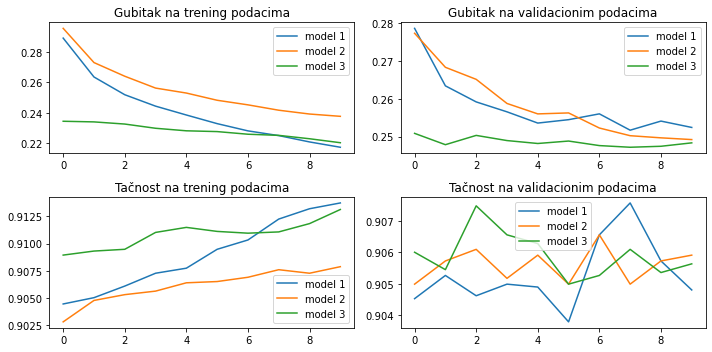

In [19]:
names = ['model 1', 'model 2', 'model 3']
compare_models_plot([history1, history2, history3], names)

Sve u svemu, model 2 se čini najbolji.

In [20]:
test_scores = model2.evaluate(X_test, y_test_cat, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

423/423 - 2s - loss: 0.2494 - accuracy: 0.9049 - 2s/epoch - 4ms/step
Test loss: 0.24939380586147308
Test accuracy: 0.9048993587493896
